# Indeks Harga Konsumen with FbProphet

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from fbprophet import Prophet

## Load Data

In [2]:
df = pd.read_csv("data/Data_Inflasi_IHK_2001_2021.csv", parse_dates=['Tanggal'])
df.Tanggal = pd.to_datetime(df.Tanggal)
df.head(10)

,Tanggal,IHK,Inflasi
0,2001-08-01,259.48,-0.23
1,2001-09-01,263.46,1.53
2,2001-10-01,263.49,0.01
3,2001-11-01,269.43,2.25
4,2001-12-01,268.99,-0.16
5,2002-01-01,274.85,2.18
6,2002-02-01,275.43,0.21
7,2002-03-01,278.11,0.97
8,2002-04-01,273.15,-1.78
9,2002-05-01,282.70,3.50


In [3]:
df.tail(10)

,Tanggal,IHK,Inflasi
230,2020-10-01,104.99,0.10
231,2020-11-01,105.27,0.27
232,2020-12-01,105.76,0.47
233,2021-01-01,106.37,0.58
234,2021-02-01,106.41,0.04
235,2021-03-01,106.95,0.17
236,2021-04-01,107.61,0.96
237,2021-05-01,107.29,-0.30
238,2021-06-01,107.36,0.07
239,2021-07-01,107.66,0.28


In [4]:
df.shape

(240, 3)

In [5]:
df.dtypes

Tanggal    datetime64[ns]
IHK               float64
Inflasi           float64
dtype: object

In [6]:
df.isna().sum()

Tanggal    0
IHK        0
Inflasi    0
dtype: int64

In [7]:
df.drop(columns='Inflasi', axis=1, inplace=True)

In [8]:
df.shape

(240, 2)

In [9]:
df.rename(columns={'Tanggal': 'ds', 'IHK': 'y'}, inplace=True)

In [10]:
series = df
X_train, X_test = series[:-45], series[-45:]

In [11]:
X_train.shape

(195, 2)

In [12]:
X_test.shape

(45, 2)

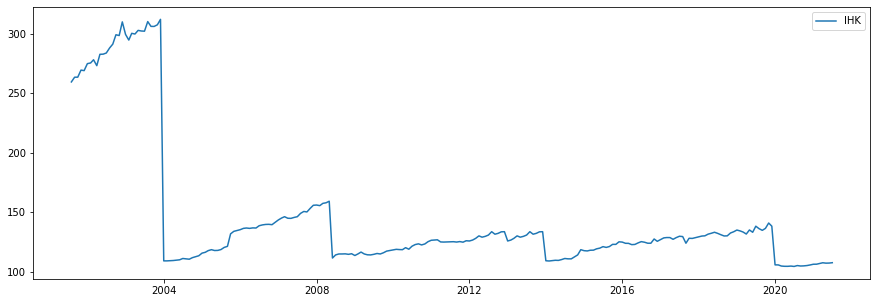

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(df.ds, df.y, label='IHK')
plt.legend();

In [14]:
model = Prophet(interval_width=0.95, seasonality_mode='multiplicative')

In [15]:
model.fit(X_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

In [16]:
future = model.make_future_dataframe(51, freq='M')
forecast = model.predict(future)

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-08-01,287.475358,229.088215,354.545693,287.475358,287.475358,0.021336,0.021336,0.021336,0.021336,0.021336,0.021336,0.0,0.0,0.0,293.608861
1,2001-09-01,284.432573,235.535797,355.862267,284.432573,284.432573,0.031042,0.031042,0.031042,0.031042,0.031042,0.031042,0.0,0.0,0.0,293.262018
2,2001-10-01,281.487942,232.978329,354.147229,281.487942,281.487942,0.043789,0.043789,0.043789,0.043789,0.043789,0.043789,0.0,0.0,0.0,293.814079
3,2001-11-01,278.445157,231.407556,353.055242,278.445157,278.445157,0.058237,0.058237,0.058237,0.058237,0.058237,0.058237,0.0,0.0,0.0,294.660934
4,2001-12-01,275.500526,233.019978,362.359710,275.500526,275.500526,0.074737,0.074737,0.074737,0.074737,0.074737,0.074737,0.0,0.0,0.0,296.090609


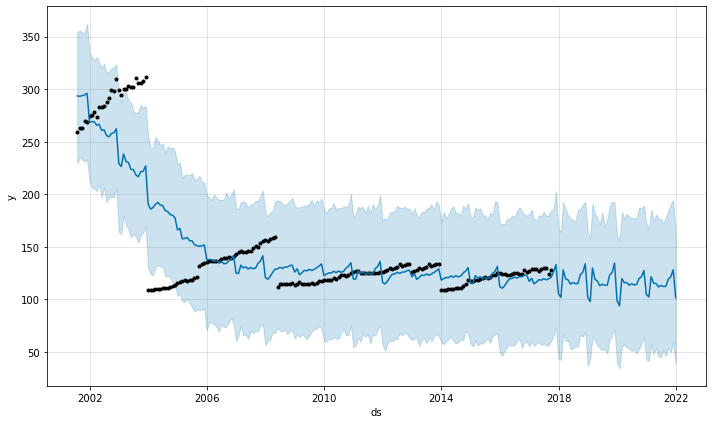

In [18]:
fig1 = model.plot(forecast)

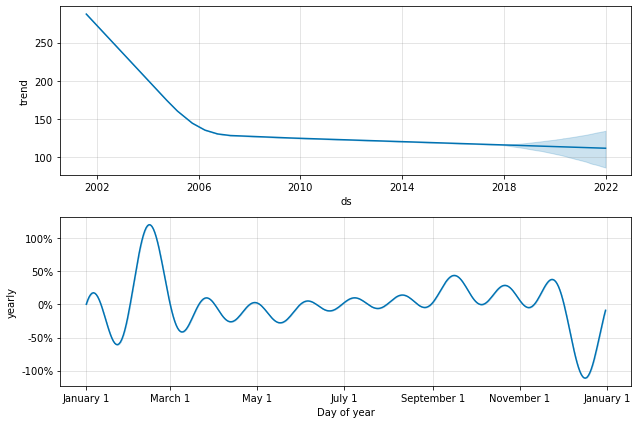

In [19]:
fig2 = model.plot_components(forecast)

In [20]:
pred = forecast[['ds','yhat']]

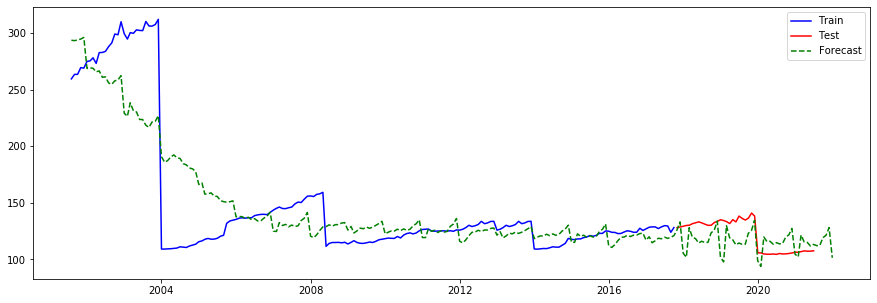

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(X_train.ds, X_train.y, 'b-', label='Train')
plt.plot(X_test.ds, X_test.y, 'r-', label='Test')
plt.plot(pred.ds, pred.yhat, 'g--', label='Forecast')
plt.legend();

## Hasil Forecasting

In [25]:
pred

,ds,yhat
0,2001-08-01,293.608861
1,2001-09-01,293.262018
2,2001-10-01,293.814079
3,2001-11-01,294.660934
4,2001-12-01,296.090609
...,...,...
241,2021-08-31,112.461535
242,2021-09-30,119.216177
243,2021-10-31,121.408384
244,2021-11-30,128.176293
